# Rental Price Analysis in the UAE

## Project Objective


The UAE's real estate market offers a wide range of opportunities and challenges for renters, property owners, and investors. Understanding what drives rental prices is essential for making smart decisions in this market. This project uses data analytics to uncover important insights about rental trends in the UAE.

We analyze rental prices to see how factors like location, property type, and furnishings affect costs. By converting prices to a globally recognized currency, we make the information useful for international investors. We also look at how long properties stay on the market to understand demand patterns.

Our statistical analysis highlights key trends and unusual patterns, giving a clearer picture of the rental market. This project aims to provide useful knowledge for anyone involved in the UAE real estate market, helping them make better decisions, find affordable rentals, or invest wisely. The insights from this analysis are crucial for navigating and succeeding in the UAE rental market.



**Workflow**
* Data Source and Selection
* Analyzing Rental Price Extremes
* Converting the Currency
* Distribution Analysis
* Box Plot Analysis
* Categorical Bar Charts and the Impact of Property Types
* Comparative Analysis
* Time on Market
* Ordinary Least Squares (OLS) Regression Analysis
* Folium Map
* Geographical Heatmap
* Conclusion


To support the analysis and modeling for this project, a selection of powerful Python libraries will be utilized, each chosen for its specific capabilities in handling data processing, statistical modeling, and visualization:

* Pandas: These foundational libraries provide extensive functionalities for data manipulation and numerical computations. Pandas offers data structures and operations for manipulating numerical tables and time series, making it ideal for handling financial datasets. 

* Matplotlib and Seaborn: These libraries are used for creating static, interactive, and animated visualizations in Python. Matplotlib serves as the base framework, offering a multitude of plotting functions. Seaborn extends Matplotlib by providing a high-level interface for drawing attractive and informative statistical graphics.

* Folium: This library is used for creating interactive maps. It allows us to visualize geographic data and add various map layers to enhance our analysis.

* Folium.plugins.HeatMap: This plugin for Folium helps in creating heat maps, which are useful for showing the intensity of data points over a geographic area, such as rental prices across different locations.

* Statsmodels.api: This library provides tools for statistical modeling and hypothesis testing. It is particularly useful for performing regression analysis, which helps in understanding the relationship between different variables in our dataset.

**Data Source and Selection:** The data for this analysis is sourced from Kaggle and provides a detailed snapshot of rental property listings across cities in the United Arab Emirates. The data was collected from 31/01/2024 until 20/04/2024.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from folium.plugins import HeatMap
import statsmodels.api as sm


# Load the CSV data from the specified path
data = pd.read_csv(r'C:\Users\ARighas\Downloads\dubai_prop.csv')

print(data)

                                                 Address    Rent  Beds  Baths  \
0      The Gate Tower 2, The Gate Tower, Shams Gate D...  124000     3      4   
1                    Water's Edge, Yas Island, Abu Dhabi  140000     3      4   
2                Al Raha Lofts, Al Raha Beach, Abu Dhabi   99000     2      3   
3      Marina Heights, Marina Square, Al Reem Island,...  220000     3      4   
4                        West Yas, Yas Island, Abu Dhabi  350000     5      7   
...                                                  ...     ...   ...    ...   
73001                          Al Salamah, Umm Al Quwain   10000     0      1   
73002                           Al Ramlah, Umm Al Quwain   25000     1      1   
73003                Umm Al Quwain Marina, Umm Al Quwain   22000     2      2   
73004             Al Huboob 1, Al Salamah, Umm Al Quwain   14000     0      1   
73005                Umm Al Quwain Marina, Umm Al Quwain   14000     0      1   

            Type  Area_in_s

**Analyzing Rental Price Extremes:** In this section, we perform a data-driven analysis to identify the most and least expensive rental listings. This analysis is useful for renters looking to find affordable housing options and for investors aiming to understand potential rental income in various areas. By sorting and examining the rental prices, we gain insights into the rental market dynamics in the UAE.

In [2]:
# Sort dataframe by rent column in descending order to find the most expensive listings
data_sorted_desc = data.sort_values(by='Rent', ascending=False)

# Display the most expensive listing
most_expensive = data_sorted_desc.head(1)
print("Most Expensive Listing:")
print(most_expensive)

# Sort the dataframe by the rent column in ascending order to find the cheapest listings
data_sorted_asc = data.sort_values(by='Rent', ascending=True)

# Display the cheapest listing
cheapest = data_sorted_asc.head(1)
print("\nCheapest Listing:")
print(cheapest)

# Calculate the monthly rent and add it as a new column
data['Monthly_Rent'] = data['Rent'] / 12

# Display the updated dataframe with monthly rent
print("\nData with Monthly Rent:")
print(data[['Address', 'Rent', 'Monthly_Rent']].head())

Most Expensive Listing:
                                                 Address      Rent  Beds  \
56451  Dubai Investment Park 1, Dubai Investment Park...  55000000    11   

       Baths                  Type  Area_in_sqft  Rent_per_sqft Rent_category  \
56451      2  Residential Building        129576      424.46132          High   

      Frequency   Furnishing   Purpose Posted_date  Age_of_listing_in_days  \
56451    Yearly  Unfurnished  For Rent  30/03/2024                      22   

                          Location   City   Latitude  Longitude  
56451  Dubai Investment Park (DIP)  Dubai  24.985928  55.175013  

Cheapest Listing:
                                                 Address  Rent  Beds  Baths  \
57978  The Address Residences Dubai Opera, Downtown D...   290     2      2   

            Type  Area_in_sqft  Rent_per_sqft Rent_category Frequency  \
57978  Apartment          1250          0.232           Low    Yearly   

      Furnishing   Purpose Posted_date  Age_of

**Converting the Currency:** Now lets get a better understanding with our prices and exchange it to dollars. this will help us understand better by using a recognized and frequently used global currency. this exchange will also help investors understand better when they buy a property and the difference in prices.

In [3]:
# exchange rate from AED to USD
exchange_rate = 0.27

# Convert monthly rent from AED to USD
data['Monthly_Rent_USD'] = data['Monthly_Rent'] * exchange_rate

# Display the updated dataframe with monthly rent in USD
print("Data with Monthly Rent in USD:")
print(data[['Address', 'Rent', 'Monthly_Rent', 'Monthly_Rent_USD']].head())

Data with Monthly Rent in USD:
                                             Address    Rent  Monthly_Rent  \
0  The Gate Tower 2, The Gate Tower, Shams Gate D...  124000  10333.333333   
1                Water's Edge, Yas Island, Abu Dhabi  140000  11666.666667   
2            Al Raha Lofts, Al Raha Beach, Abu Dhabi   99000   8250.000000   
3  Marina Heights, Marina Square, Al Reem Island,...  220000  18333.333333   
4                    West Yas, Yas Island, Abu Dhabi  350000  29166.666667   

   Monthly_Rent_USD  
0            2790.0  
1            3150.0  
2            2227.5  
3            4950.0  
4            7875.0  


**Distribution Analysis** To better understand the rental prices and their distribution, we performed a series of analyses and visualizations. This helps us identify patterns, outliers, and the impact of different property features on rent.

Descriptive Statistics:
* Count: We have 73,006 observations in our dataset.
* Mean (Average Rent): The average rent is approximately 148,406 AED.
* Standard Deviation (std): The rent values have a standard deviation of 308,292 AED, indicating high variability.
* Min and Max: The minimum rent is 290 AED, and the maximum rent is 55,000,000 AED, showing a wide range.
* Percentiles (25%, 50%, 75%): These values help us understand the distribution of rents. For example, 25% of the properties have rents below 54,999 AED, while 75% have rents below 170,000 AED.

By performing these analyses, we gained a comprehensive understanding of rental prices in the UAE. We found that:

* Rental prices vary widely, with a few extremely high rents skewing the distribution.
* More bedrooms and certain property types (like residential buildings and floors) command higher rents.
* Visualizing rent distributions helps identify patterns and outliers, offering valuable insights for property owners, renters, and real estate professionals.

Descriptive Statistics for Rent and Area:
               Rent   Area_in_sqft
count  7.300600e+04   73006.000000
mean   1.484069e+05    2035.292620
std    3.082928e+05    2975.992376
min    2.900000e+02      74.000000
25%    5.499900e+04     850.000000
50%    9.800000e+04    1329.000000
75%    1.700000e+05    2100.000000
max    5.500000e+07  210254.000000


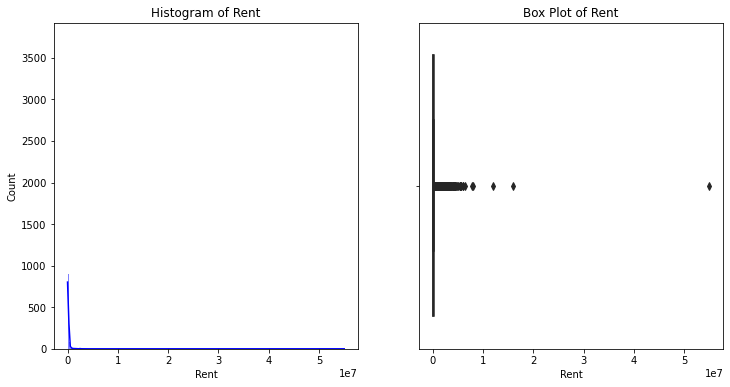


Average Rent by Number of Bedrooms:
Beds
0     4.421111e+04
1     8.043482e+04
2     1.291488e+05
3     1.827501e+05
4     2.760587e+05
5     3.052488e+05
9     3.414167e+05
8     3.427429e+05
6     4.252641e+05
7     4.926176e+05
12    6.000000e+05
10    9.640426e+05
11    1.318166e+06
Name: Rent, dtype: float64

Average Rent by Property Type:
Type
Apartment               1.100246e+05
Villa Compound          1.799667e+05
Townhouse               1.916066e+05
Hotel Apartment         2.267081e+05
Villa                   2.871739e+05
Residential Plot        2.996498e+05
Penthouse               4.870754e+05
Residential Floor       1.409327e+06
Residential Building    2.866282e+06
Name: Rent, dtype: float64


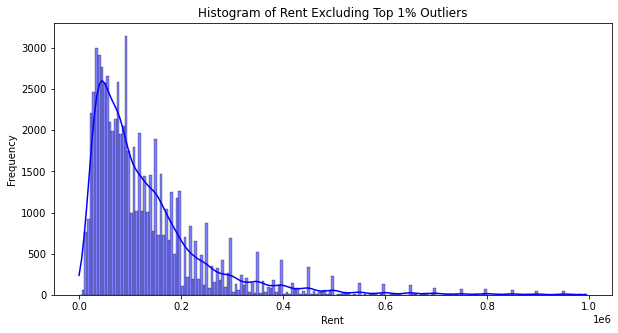

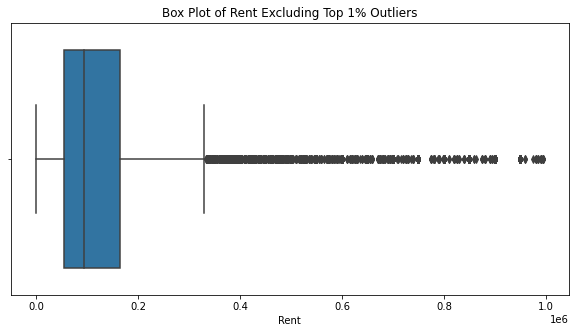

In [4]:
# Descriptive statistics for Rent & Area_in_sqft
print("Descriptive Statistics for Rent and Area:")
print(data[['Rent', 'Area_in_sqft']].describe())

# Rent distribution analysis using histograms and box plots
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(data['Rent'], kde=True, color='blue')
plt.title('Histogram of Rent')
plt.subplot(1, 2, 2)
sns.boxplot(x=data['Rent'], color='green')
plt.title('Box Plot of Rent')
plt.show()


# Analyzing the impact of property features on rent
# Using groupby to find average rent by number of bedrooms and property type
print("\nAverage Rent by Number of Bedrooms:")
print(data.groupby('Beds')['Rent'].mean().sort_values())

print("\nAverage Rent by Property Type:")
print(data.groupby('Type')['Rent'].mean().sort_values())





# Filtering out extreme outliers
filtered_data = data[data['Rent'] < data['Rent'].quantile(0.99)]  # Keeps 99% of the data, excluding the top 1%

plt.figure(figsize=(10, 5))
sns.histplot(filtered_data['Rent'], kde=True, color='blue')
plt.title('Histogram of Rent Excluding Top 1% Outliers')
plt.xlabel('Rent')
plt.ylabel('Frequency')
plt.show()

# Filtering out extreme outliers for box plot
filtered_data = data[data['Rent'] < data['Rent'].quantile(0.99)]  # Excludes the top 1% of rents

plt.figure(figsize=(10, 5))
sns.boxplot(x=filtered_data['Rent'])
plt.title('Box Plot of Rent Excluding Top 1% Outliers')
plt.xlabel('Rent')
plt.show()

**Box Plot Analysis** As we can see in the box plot above has many outliers, so to avoid this we will filter out the top 1 percent of the data. each boxpolot represents a city, the central line in each box indicates the median rent, the box outline indicates the interquartile range or IQR and the whiskers extend to show the range of usual rent prices without the outliers. the visualization below will help compare the average prices of rent accross different cities. this will provide insights into which cities are more expensive on average in comparison to the rest of the cities. As we can see below in the new box chart, the average rent for Dubai is higher than the rest of the cities with second in place for high average price is Abu Dhabi.

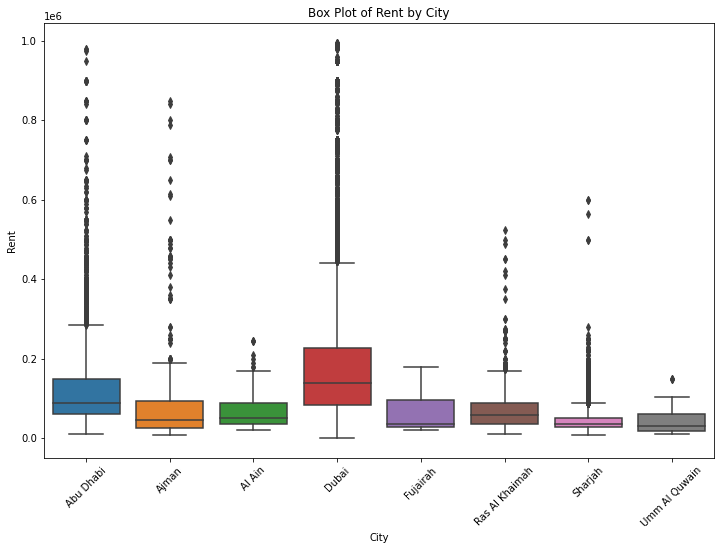

In [5]:
# Filtering out outliers for box plot
filtered_data = data[data['Rent'] < data['Rent'].quantile(0.99)]

plt.figure(figsize=(12, 8))
sns.boxplot(x='City', y='Rent', data=filtered_data)
plt.title('Box Plot of Rent by City')
plt.xlabel('City')
plt.ylabel('Rent')
plt.xticks(rotation=45)  
plt.show()

**Categorical Bar Charts and the Impact of Property Types** Now lets take a look at the average rent per the number of bedrooms, the type of properties and the locations. this will help identify the features that affect rental prices in the UAE.
To make this analysis we need to compile a bar plot, this will provide a clear visual comparison of average rent prices across different categories.


To better understand what affects rental prices in the UAE, we analyzed the average rent across different categories: the number of bedrooms, property types, and locations. The analysis revealed that properties with more bedrooms generally have higher rents, with those having 10 or more bedrooms commanding the highest prices due to their larger size and luxury status. When examining property types, apartments have the lowest average rent, while residential buildings and floors have the highest, likely due to their size and prime locations. Penthouses, villas, and villa compounds also show high rents, reflecting their luxury appeal. In terms of location, Emirates Hills tops the list with the highest average rent, indicating its desirability and luxury. Other high-rent locations include Knowledge Village, Dubai Investment Park (DIP), and Jumeirah Islands, which are likely in high demand due to their amenities and prestige. These insights help property owners, renters, and real estate professionals understand market trends and make informed decisions, highlighting that properties with more bedrooms, luxury property types, and prime locations command higher rents.

Average Rent by Number of Bedrooms:
Beds
0     4.421111e+04
1     8.043482e+04
2     1.291488e+05
3     1.827501e+05
4     2.760587e+05
5     3.052488e+05
9     3.414167e+05
8     3.427429e+05
6     4.252641e+05
7     4.926176e+05
12    6.000000e+05
10    9.640426e+05
11    1.318166e+06
Name: Rent, dtype: float64

Average Rent by Property Type:
Type
Apartment               1.100246e+05
Villa Compound          1.799667e+05
Townhouse               1.916066e+05
Hotel Apartment         2.267081e+05
Villa                   2.871739e+05
Residential Plot        2.996498e+05
Penthouse               4.870754e+05
Residential Floor       1.409327e+06
Residential Building    2.866282e+06
Name: Rent, dtype: float64

Top 20 Average Rent by Location:
Location
Emirates Hills                 2.147740e+06
Knowledge Village              1.859550e+06
Dubai Investment Park (DIP)    1.474200e+06
Jumeirah Islands               1.327426e+06
Al Barari                      8.937574e+05
Al Hebiah 2              

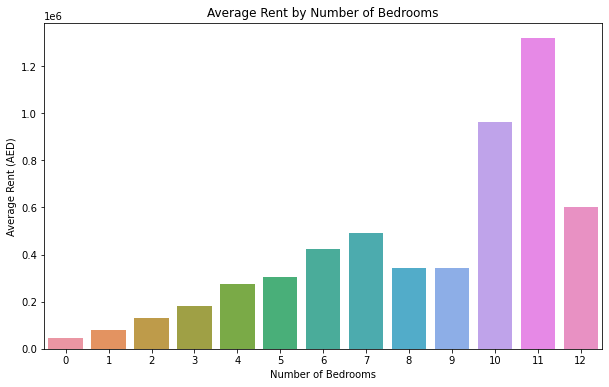

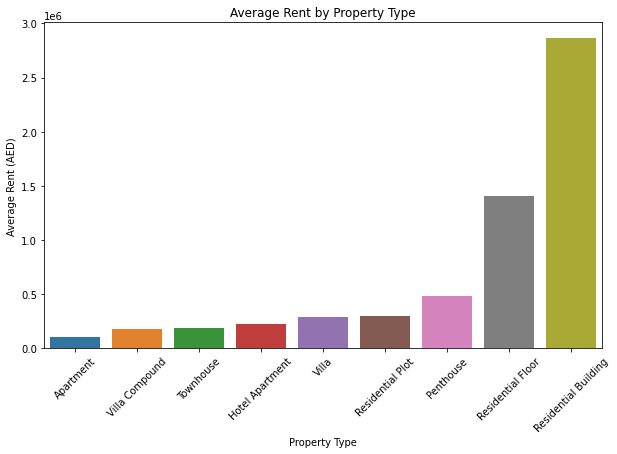

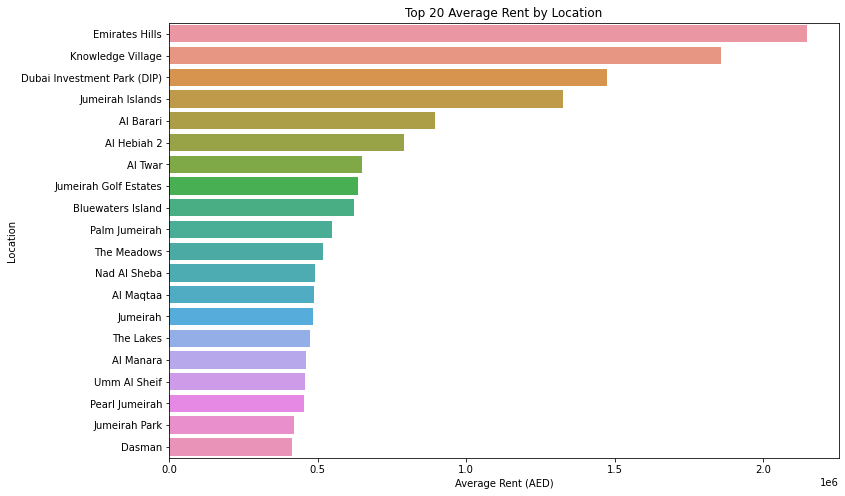

In [6]:
# Average rent by number of bedrooms
avg_rent_by_beds = data.groupby('Beds')['Rent'].mean().sort_values()
print("Average Rent by Number of Bedrooms:")
print(avg_rent_by_beds)

# Average rent by property type
avg_rent_by_type = data.groupby('Type')['Rent'].mean().sort_values()
print("\nAverage Rent by Property Type:")
print(avg_rent_by_type)

# Calculate the average rent by location and sort it to get the top 20 locations
avg_rent_by_location = data.groupby('Location')['Rent'].mean().sort_values(ascending=False).head(20)
print("\nTop 20 Average Rent by Location:")
print(avg_rent_by_location)


# Average rent by number of bedrooms
plt.figure(figsize=(10, 6))
sns.barplot(x=avg_rent_by_beds.index, y=avg_rent_by_beds.values)
plt.title('Average Rent by Number of Bedrooms')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Average Rent (AED)')
plt.show()

#Average rent by property type
plt.figure(figsize=(10, 6))
sns.barplot(x=avg_rent_by_type.index, y=avg_rent_by_type.values)
plt.title('Average Rent by Property Type')
plt.xlabel('Property Type')
plt.ylabel('Average Rent (AED)')
plt.xticks(rotation=45)  # Rotate property type labels for better readability
plt.show()

# Top 20 average rent by location
plt.figure(figsize=(12, 8))
sns.barplot(x=avg_rent_by_location.values, y=avg_rent_by_location.index)
plt.title('Top 20 Average Rent by Location')
plt.xlabel('Average Rent (AED)')
plt.ylabel('Location')
plt.show()


**Comparative Analysis** Now lets find out if funished or unfurnished homes have a higher average rent price depending on the type of home.


The chart shows that residential buildings and residential floors have a significant difference in rent, with unfurnished units having a much higher average rent compared to furnished ones. For hotel apartments, there is a slight preference for unfurnished units, leading to higher average rents. Interestingly, townhouses and villa compounds have higher average rents for furnished units, which may indicate different market segments or demand patterns for these types of homes. In the case of apartments, penthouses, and villas, the results are the same as townhouses and villa compounds. Furnished apartments and villas tend to have higher rents, while furnished penthouses do not show a significant difference. 

The chart shows a significant anomaly with residential buildings, the average rent for unfurnished units is much higher than that for furnished units, which is unusual. Typically, furnished properties command higher rents due to the convenience and immediate move-in readiness they offer. This could be explained as unfurnished units being larger or located in more desirable parts of the residential building, leading to higher rents. They might also be newer or offer better amenities compared to furnished units. Additionally, this could be from these unfurnished units targeting a different demographic that prefers to use their own furnishings, such as long-term tenants or businesses leasing large spaces. This preference can influence the higher rents for unfurnished units.

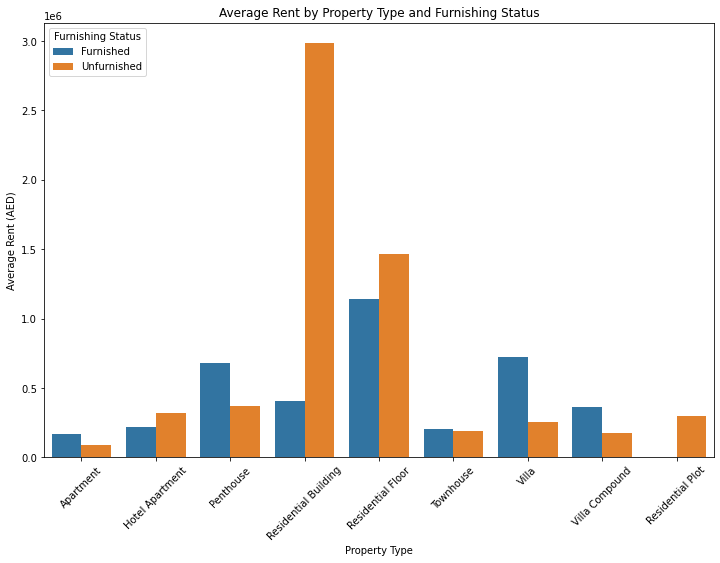

In [7]:
# Group by furnishing and type to find average rent
grouped_data = data.groupby(['Furnishing', 'Type'])['Rent'].mean().reset_index()

# Plot bar chart
plt.figure(figsize=(12, 8))
sns.barplot(x='Type', y='Rent', hue='Furnishing', data=grouped_data)
plt.title('Average Rent by Property Type and Furnishing Status')
plt.xlabel('Property Type')
plt.ylabel('Average Rent (AED)')
plt.xticks(rotation=45)  
plt.legend(title='Furnishing Status')
plt.show()

**Time on Market** Lets try to find the average age of listings for each type of property, this will give insight into understand which types of properties tend to stay online for longer periods and might indicate market demand or other factors influencing listing durations.


**Results:**
Residential plots have the shortest average time on the market at approximately 50.67 days, indicating higher demand or quicker turnover rates. Townhouses also exhibit a relatively short average listing duration of about 66.85 days, suggesting steady demand. Apartments stay online for around 73.81 days on average, which is moderate compared to other property types. Villas, with an average listing age of 75.78 days, have a slightly longer duration, indicating they might be in less demand or take longer to find suitable tenants or buyers.

Residential buildings, averaging around 76.91 days, show similar listing times to villas, indicating moderate demand. Hotel apartments stay online for about 77.50 days on average, reflecting a niche market with specific demand patterns. Penthouses tend to stay listed for approximately 79.03 days, possibly due to their premium nature and higher price points, which can limit the pool of potential tenants or buyers.

Villa compounds have a longer average listing duration of around 86.67 days, suggesting they may be less in demand or cater to a specific segment of the market. Residential floors have the longest average listing age at 102 days, indicating the lowest demand or possibly the most specialized market requirements.

Average Age of Listings by Property Type:
Type
Residential Plot         50.666667
Townhouse                66.852795
Apartment                73.809070
Villa                    75.784292
Residential Building     76.909091
Hotel Apartment          77.498915
Penthouse                79.033835
Villa Compound           86.666667
Residential Floor       102.000000
Name: Age_of_listing_in_days, dtype: float64


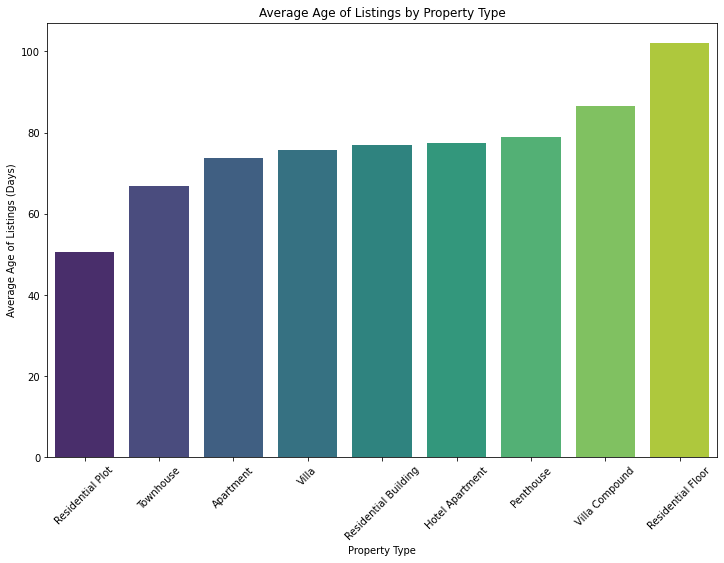

In [17]:
# Calculate average age of listings for each property type
avg_age_by_type = data.groupby('Type')['Age_of_listing_in_days'].mean().sort_values()
print("Average Age of Listings by Property Type:")
print(avg_age_by_type)

# Visualize average age of listings by property type
plt.figure(figsize=(12, 8))
sns.barplot(x=avg_age_by_type.index, y=avg_age_by_type.values, palette='viridis')
plt.title('Average Age of Listings by Property Type')
plt.xlabel('Property Type')
plt.ylabel('Average Age of Listings (Days)')
plt.xticks(rotation=45) 
plt.show()

 **Ordinary Least Squares (OLS) Regression Analysis** Now we will perform a multiple linear regression to understand the impact of bedrooms and bathrooms on rent. By performing this regression analysis, we can determine the impact of additional bedrooms and bathrooms on the retal price. This analysis provides valuable insights for property owners, investors, and tenants about how property features influence rent.


**Explaining the Results:**


* R-squared: 0.150
The result of 0.15 indicates that 15% of variability in the rent can be explained by the number of beds and bathrooms. While this suggests that there are other factors not included in the model that affect the rent prices, one being the location of the property and the other the square feet of the property.


* Adjusted R-squared: 0.150
This is similar to the R-squared but adjusted for the number of predictors in the model. It helps in understanding the explanatory power with consideration for the number of variables used.

* F-statistic: 6457
Prob (F-statistic): 0.00
The F-statistic tests show the overal significance of the model. A non-existent p-value indicates that the model is statistically significant, meaning that the variables have a significant effect on the rent

**Coefficients:**

* const (Intercept) or Coefficients: 81470
The coefficients represents the expected rent when both number of bed and bathrooms are zero. While not a practical real-world scenario, it serves as the baseline rent.

* Beds: 112300
The coefficient for Beds indicates that for each additional bedroom, the rent increases by approximately 112,300 AED, assuming the number of bathrooms remains constant.
P-value: 0.000
The very low p-value indicates that this coefficient is statistically significant.

* Baths: -66340
The coefficient for Baths indicates that for each additional bathroom, the rent decreases by approximately 66,340 AED, assuming the number of bedrooms remains constant.
P-value: 0.000
The very low p-value indicates that this coefficient is statistically significant.


**Understandning the Results:**


* Impact of Bedrooms:

An extra bedroom is associated with a significant increase in rent (112,300 AED). This suggests that properties with more bedrooms command higher rents, which is a typical finding in real estate.


* Impact of Bathrooms:

Interestingly, having an extra bathroom seems to decrease the rent by 66,340 AED. This surprising result might be because the number of bedrooms and bathrooms are closely correlated, which might confuse the analysis. It could also mean there's an issue with the data. Usually, more bathrooms would lead to higher rent.


* Omnibus, Prob(Omnibus), Jarque-Bera (JB), Skew, Kurtosis:

The statistics for normality tests show very high values and a probability of 0.000, indicating that the errors in our model are not normally distributed. This can impact the reliability of our model's results.

The Durbin-Watson statistic is 1.931, which tests for patterns in the errors. Since it's close to 2, it suggests there aren't significant patterns or autocorrelation in the errors.

The Condition Number is 8.13, which checks for multicollinearity (when predictor variables are too similar to each other). Values above 30 are an issue, but 8.13 is fine. However, the unexpected result for the number of bathrooms means we should look into this further.



In [16]:
# OLS Regression 
# Prepare data for regression
X = data[['Beds', 'Baths']]  # Independent variables
X = sm.add_constant(X)  # Add a constant term to the model
y = data['Rent']  # Dependent variable

# Fit the regression model
model = sm.OLS(y, X).fit()

# Print regression results
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   Rent   R-squared:                       0.150
Model:                            OLS   Adj. R-squared:                  0.150
Method:                 Least Squares   F-statistic:                     6457.
Date:                Sun, 19 May 2024   Prob (F-statistic):               0.00
Time:                        01:56:07   Log-Likelihood:            -1.0204e+06
No. Observations:               73006   AIC:                         2.041e+06
Df Residuals:                   73003   BIC:                         2.041e+06
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       8.147e+04   2023.839     40.253      0.0

**Folium Map:** Let's create an interactive map to better understand the geographical distribution of rental properties in the UAE. Using Folium, we can visualize the exact locations of properties and explore their details through interactive markers. We had to limit the number of markers to 700 to ensure optimal performance without compromising the maps informative structure.

In [9]:
# Create a map centered around the locations of the properties
map_uae = folium.Map(location=[24.494022, 54.607372], zoom_start=10, tiles='CartoDB Positron')

# Add markers for each property 
for idx, row in data.iterrows():
    if idx < 700:  # Limit to 700 properties 
        folium.Marker(
            location=[row['Latitude'], row['Longitude']],
            popup=(f"Address: {row['Address']}<br>"
                   f"Rent: {row['Rent']} AED/year<br>"
                   f"Beds: {row['Beds']} Baths: {row['Baths']}<br>"
                   f"Type: {row['Type']} Area: {row['Area_in_sqft']} sqft"),
            icon=folium.Icon(color='blue', icon='info-sign')
        ).add_to(map_uae)

# Display map 
map_uae

**Geographical Heatmap:** a heatmap is graphical representation of data where values are represented as colors, the warmer the color the higher the values and the cooler the color the lower the value. Usually a heatmap is used to show areas of high population density or traffic incidents depending on what data you have and what you would like to see in an area. 
Our heatmap will show the highest rental rates across different areas of the UAE. By visualizing rental prices geographically, we can easily identify hotspots where rents are highest. This tool allows us to see at a glance which areas are the most and least expensive, helping to inform decisions about where to rent or invest.

In [10]:
# Initialize map 
map_uae = folium.Map(location=[24.494022, 54.607372], zoom_start=10, tiles='CartoDB Positron')

# Create data for the HeatMap, where the intensity is based on the annual Rent
# Intensity values based on the range of rents
heat_data = [[row['Latitude'], row['Longitude'], row['Rent']] for index, row in data.iterrows()]

# HeatMap layer to visualize rent intensity
HeatMap(heat_data, radius=15, blur=10, max_zoom=1, gradient={0.2: 'blue', 0.4: 'lime', 0.6: 'yellow', 0.8: 'orange', 1: 'red'}).add_to(map_uae)

# Display map 
map_uae

**Conclusion:**

This project has provided a thorough analysis of rental prices in the UAE, using data from major cities like Abu Dhabi, Dubai, Sharjah, Ajman, Ras Al Khaimah, Umm Al Quwain, and Al Ain. We sorted and visualized the data, converted rental prices to USD for better global understanding, and performed various statistical analyses to uncover important insights about the rental market.

Key findings show that rental prices are influenced by factors such as the number of bedrooms, property type, and whether the property is furnished or unfurnished. We also found significant differences logically in rental prices across different locations, highlighting the role of geography in the real estate market. Our analysis of how long properties stay on the market gave us insights into demand and turnover rates for different property types.

The regression analysis helped us understand how additional bedrooms and bathrooms affect rental prices, revealing some unexpected patterns that warrant further investigation. The interactive maps and heatmaps provided a clear visual representation of rental price intensity across different areas.

Overall, this project shows how data-driven insights can help understand and navigate the UAE rental market. These insights are valuable for renters looking for affordable options, property owners aiming to set competitive rents, and investors seeking to maximize their returns.